<a href="https://colab.research.google.com/github/sergiorkd/data_analytics_portfolio/blob/main/Rent_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = green> Analysis report

### Importing library and database

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,7))

In [2]:
dados = pd.read_csv('aluguel.csv', sep = ';')

In [3]:
dados.columns = ['Type', 'District','Bedrooms', 'Parking Spaces', 'Suites',
                 'Area', 'Rent', 'Service fee', 'IPTU']
dados.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## <font color = green> Database general information

In [4]:
tipo_de_dados = pd.DataFrame(dados.dtypes, columns = ['Data type'])
tipo_de_dados.columns.name = 'Variables'
tipo_de_dados

Variables,Data type
Type,object
District,object
Bedrooms,int64
Parking Spaces,int64
Suites,int64
Area,int64
Rent,float64
Service fee,float64
IPTU,float64


In [5]:
dados.shape

(32960, 9)

## <font color = green> Real estate types

In [16]:
tipo_de_imovel = dados['Type']
tipo_de_imovel.unique().size

22

#### In the table below are presented the propreties types. There are 22 differents real estate types.

In [17]:
tipo_de_imovel.drop_duplicates(inplace = True)
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.columns.name = 'Id'
tipo_de_imovel

Id,Type
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


#### Residential real estate

In [18]:
residencial = [
'Quitinete',
'Casa',
'Apartamento',
'Casa de Condomínio',
'Casa de Vila',
]

In [19]:
select = dados['Type'].isin(residencial)
dados_residencial = dados[select]
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


#### Exporting data frame

In [20]:
dados_residencial.to_csv('aluguel_residencial.csv', sep = ';', index = False)

In [21]:
dados_residencial_2 = pd.read_csv('aluguel_residencial.csv', sep= ';')
dados_residencial_2.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


#### Selecting properties classified as apartments

In [22]:
select_1 = dados_residencial_2['Type'] == 'Apartamento'
result_1 = dados_residencial_2[select_1]
N_1 = result_1.shape[0]
print(f'There are {N_1} apartments on data set.')

There are 19532 apartments on data set.


In [23]:
result_1.index = range(result_1.shape[0])
result_1.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


#### Selecting properties classified as house, condo house or villa

In [24]:
select_2 = (dados_residencial_2['Type'] == 'Casa de Condomínio') | (dados_residencial_2['Type'] == 'Casa') | (dados_residencial_2['Type'] == 'Casa de Vila')
result_2 = dados_residencial_2[select_2]
N_2 = result_2.shape[0]
print(f'There are {N_2} house, condo house or villa on data set.')

There are 2212 house, condo house or villa on data set.


In [25]:
result_2.index = range(result_2.shape[0])
result_2.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
1,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
2,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
3,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
4,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN


#### Selecting properties with area between 60 and 100 square meters, including limits

In [26]:
select_3 = (dados_residencial_2['Area'] >= 60) & (dados_residencial_2['Area'] <= 100)
result_3 = dados_residencial_2[select_3]
N_3 = result_3.shape[0]
print(f'There are {N_3} properties with area between 60 and 100 square meters on data set.')

There are 8719 properties with area between 60 and 100 square meters on data set.


In [27]:
result_3.index = range(result_3.shape[0])
result_3.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
1,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
2,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


#### Selecting properties with at least four bedrooms and rent lower than R$ 2000,00

In [28]:
select_4 = (dados_residencial_2['Bedrooms'] >= 4) & (dados_residencial_2['Bedrooms'] < 2000)
result_4 = dados_residencial_2[select_4]
N_4 = result_4.shape[0]
print(f'There are {N_4} house, propriets with at leat four beadrooms and rent lower than R$ 2000,00 on data set.')

There are 3790 house, propriets with at leat four beadrooms and rent lower than R$ 2000,00 on data set.


In [29]:
result_4.index = range(result_4.shape[0])
result_4.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
1,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
2,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN
3,Casa,Campo Grande,4,1,2,400,12000.0,NaN,NaN
4,Apartamento,Copacabana,4,1,0,244,5000.0,2500.0,4100.0


## <font color = green> Processing missing data

In [30]:
dados_residencial_2.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [31]:
dados_residencial_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            22580 non-null  object 
 1   District        22580 non-null  object 
 2   Bedrooms        22580 non-null  int64  
 3   Parking Spaces  22580 non-null  int64  
 4   Suites          22580 non-null  int64  
 5   Area            22580 non-null  int64  
 6   Rent            22571 non-null  float64
 7   Service fee     20765 non-null  float64
 8   IPTU            15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


### Null values for proprety values are not a good choice for this case, as this is one of the main information in the data set

In [32]:
dados_residencial_2.dropna(subset = ['Rent'], inplace = True)
dados_residencial_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22571 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            22571 non-null  object 
 1   District        22571 non-null  object 
 2   Bedrooms        22571 non-null  int64  
 3   Parking Spaces  22571 non-null  int64  
 4   Suites          22571 non-null  int64  
 5   Area            22571 non-null  int64  
 6   Rent            22571 non-null  float64
 7   Service fee     20758 non-null  float64
 8   IPTU            15791 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


### Null values for service fees only make sense for propreties that are not apartments. The proprety taxes will be set to zero where it is null

In [33]:
select = (dados_residencial_2['Type'] == 'Apartamento') & (dados_residencial_2['Service fee'].isnull())
dados_residencial_2 = dados_residencial_2[~select]
dados_residencial_2.fillna({'Service fee': 0, 'IPTU': 0}, inplace = True)
dados_residencial_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            21826 non-null  object 
 1   District        21826 non-null  object 
 2   Bedrooms        21826 non-null  int64  
 3   Parking Spaces  21826 non-null  int64  
 4   Suites          21826 non-null  int64  
 5   Area            21826 non-null  int64  
 6   Rent            21826 non-null  float64
 7   Service fee     21826 non-null  float64
 8   IPTU            21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


/tmp/ipython-input-33-2643820235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_residencial_2.fillna({'Service fee': 0, 'IPTU': 0}, inplace = True)


In [34]:
dados_residencial_2.to_csv('aluguel_residencial.csv', sep = ';', index = False)

## <font color = green> Creating new variables on data set.
#### Total Value
#### Rent per squared meters
#### Total value per squared meters

In [35]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [36]:
dados.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


In [37]:
dados['Total value'] = dados['Rent'] + dados['Service fee'] + dados['IPTU']
dados['Rent per m^2'] = (dados['Rent'] / dados['Area']).round(2)
dados['Total value per m^2'] = (dados['Total value'] / dados['Area']).round(2)
dados.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU,Total value,Rent per m^2,Total value per m^2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36


In [38]:
house = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
dados['Agregate type'] = dados['Type'].apply(lambda x: 'House' if x in house else 'Apartment')
dados.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU,Total value,Rent per m^2,Total value per m^2,Agregate type
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartment
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,House
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartment
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartment
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartment


#### Total value and Total value per $m^2$ are two columns that contains erros when the IPTU is note declared, therefore ites beeter to remove these variables because they will not be reliable

In [39]:
dados.drop(['Total value', 'Total value per m^2'], axis = 1, inplace = True)
dados.head()

,Type,District,Bedrooms,Parking Spaces,Suites,Area,Rent,Service fee,IPTU,Rent per m^2,Agregate type
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartment
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,House
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartment
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartment
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartment


In [40]:
dados.to_csv('aluguel_residencial.csv', sep = ';', index = False)

## <font color = green> Creating descriptive statistics

In [41]:
group_district = dados.groupby('District')

In [42]:
group_district['Rent'].sum()

,Rent
District,
Abolição,17930.0
Alto da Boa Vista,23800.0
Anchieta,3500.0
Andaraí,142077.0
Anil,145470.0
...,...
Vila Valqueire,84940.0
Vila da Penha,131100.0
Vista Alegre,17830.0


In [43]:
group_district = dados.groupby('District')
group_district['Rent'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


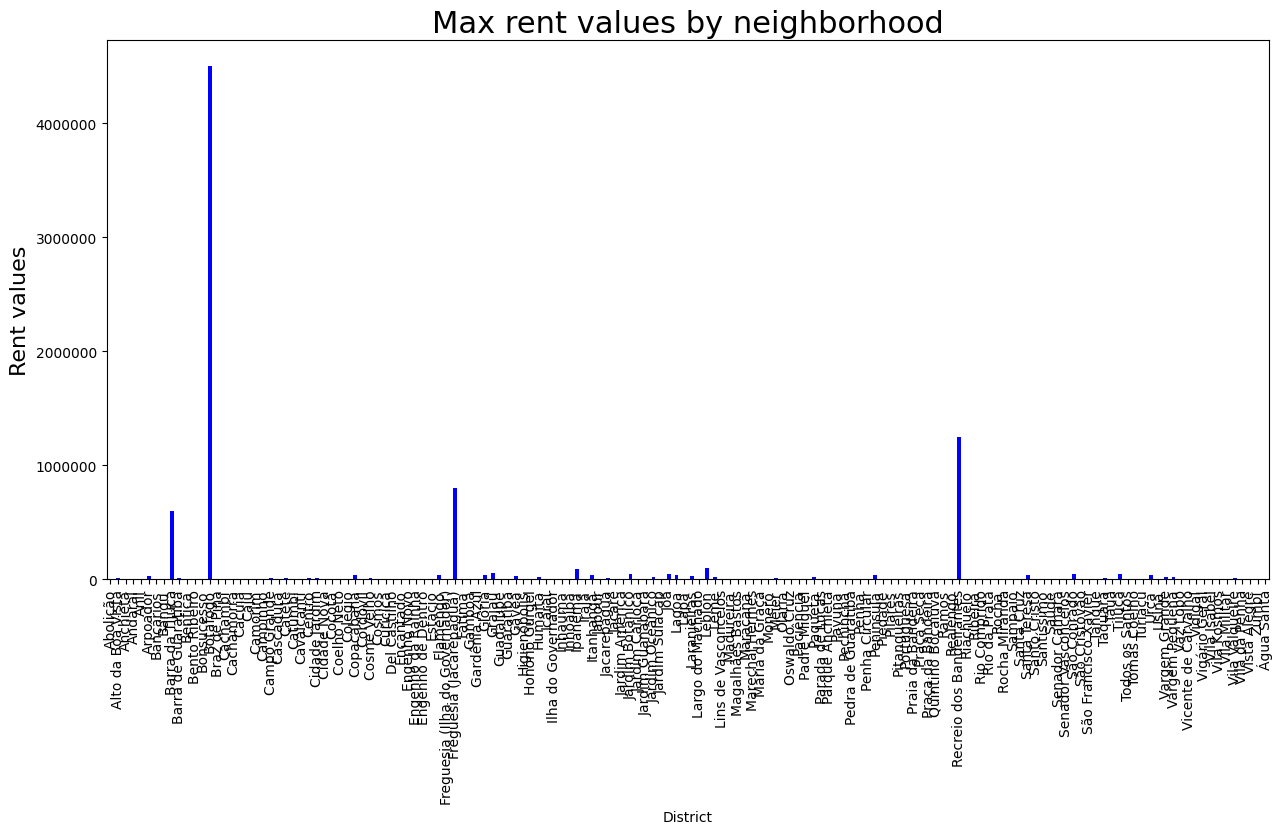

In [54]:
from matplotlib.ticker import ScalarFormatter

fig = group_district['Rent'].max().plot.bar(color='blue')
fig.set_ylabel('Rent values', fontdict={'fontsize': 16})
fig.set_title('Max rent values by neighborhood', fontdict={'fontsize': 22})

fig.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
fig.ticklabel_format(style='plain', axis='y')

In [51]:
Q1 = dados['Rent'].quantile(.25)
Q3 = dados['Rent'].quantile(.75)
IIQ = Q3 - Q1
inf_lim = Q1 - 1.5 * IIQ
sup_lim = Q1 + 1.5 * IIQ

<Axes: >

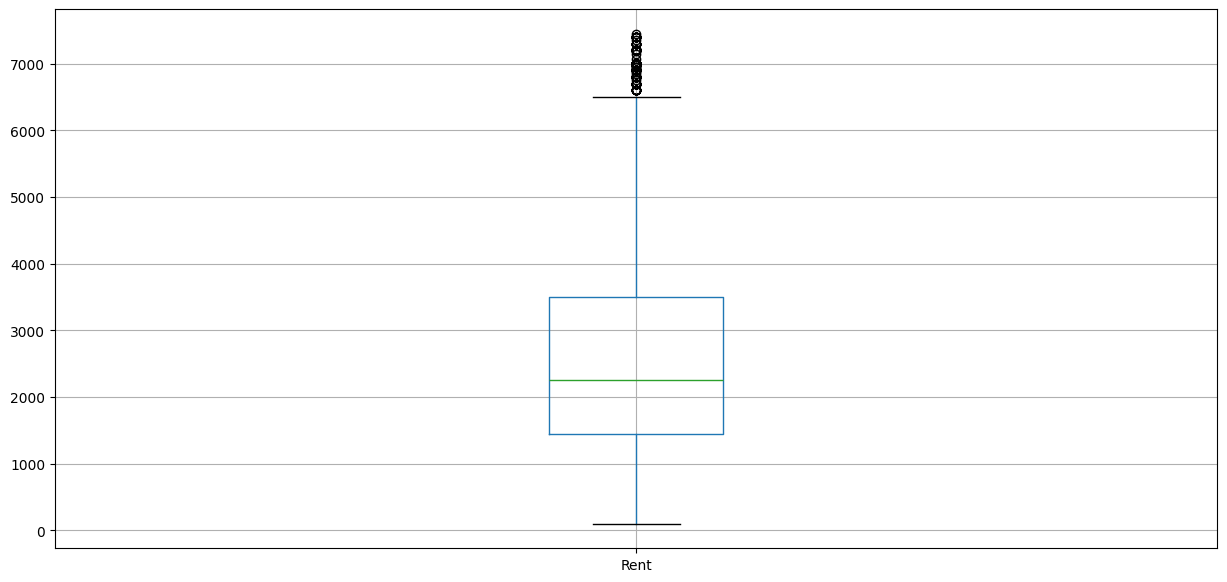

In [46]:
select = (dados['Rent'] >= inf_lim) & (dados['Rent'] <= sup_lim)
dados = dados[select]
dados.boxplot(['Rent'])

#### Looking at the Rent values its possible to identify some neighborhoods that have outliers on Rent and will be removed

<Axes: title={'center': 'Rent'}, xlabel='[Type]'>

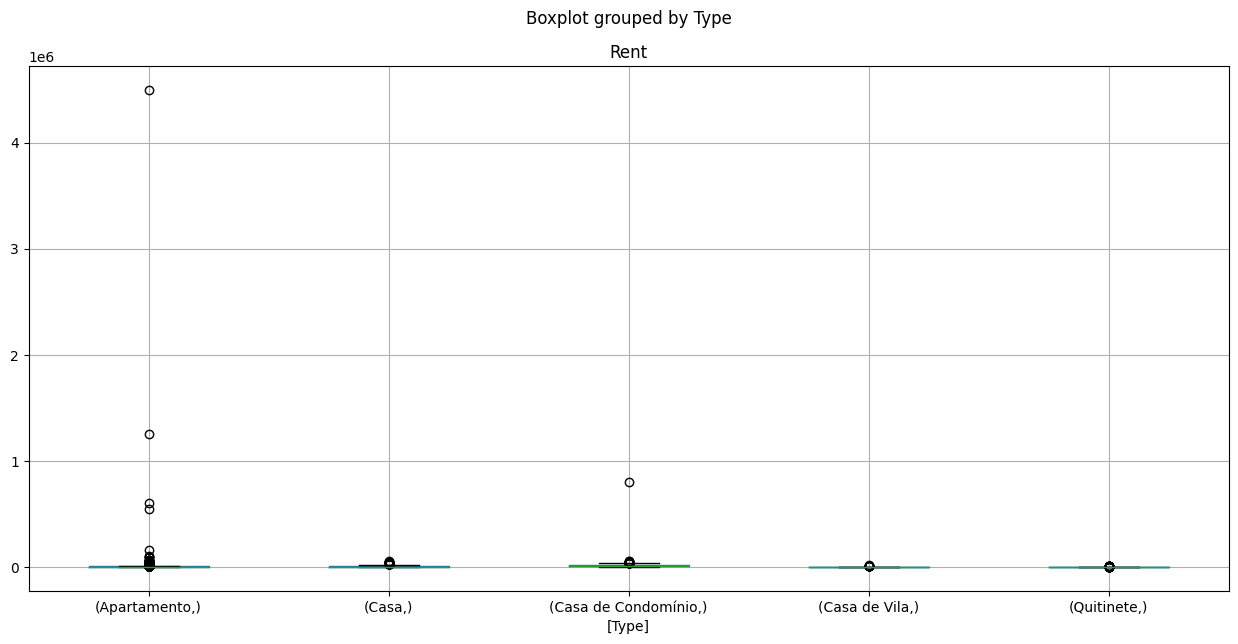

In [60]:
dados2 = pd.read_csv('aluguel_residencial.csv', sep = ';')
dados2.boxplot(['Rent'], by = ['Type'])

In [48]:
grupo_tipo = dados2.groupby('Type')['Rent']

In [64]:
grupo_tipo = dados2.groupby('Type')['Rent']

Q1 = grupo_tipo.quantile(0.25)
Q3 = grupo_tipo.quantile(0.75)
IIQ = Q3 - Q1
inf_lim = Q1 - 1.5 * IIQ
sup_lim = Q3 + 1.5 * IIQ

In [65]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados2['Type'] == tipo
    eh_dentro_limite = (
        (dados2['Rent'] >= inf_lim.loc[tipo]) &
        (dados2['Rent'] <= sup_lim.loc[tipo])
    )
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados2[selecao]
    dados_new = pd.concat([dados_new, dados_selecao], ignore_index=True)

<Axes: title={'center': 'Rent'}, xlabel='[Type]'>

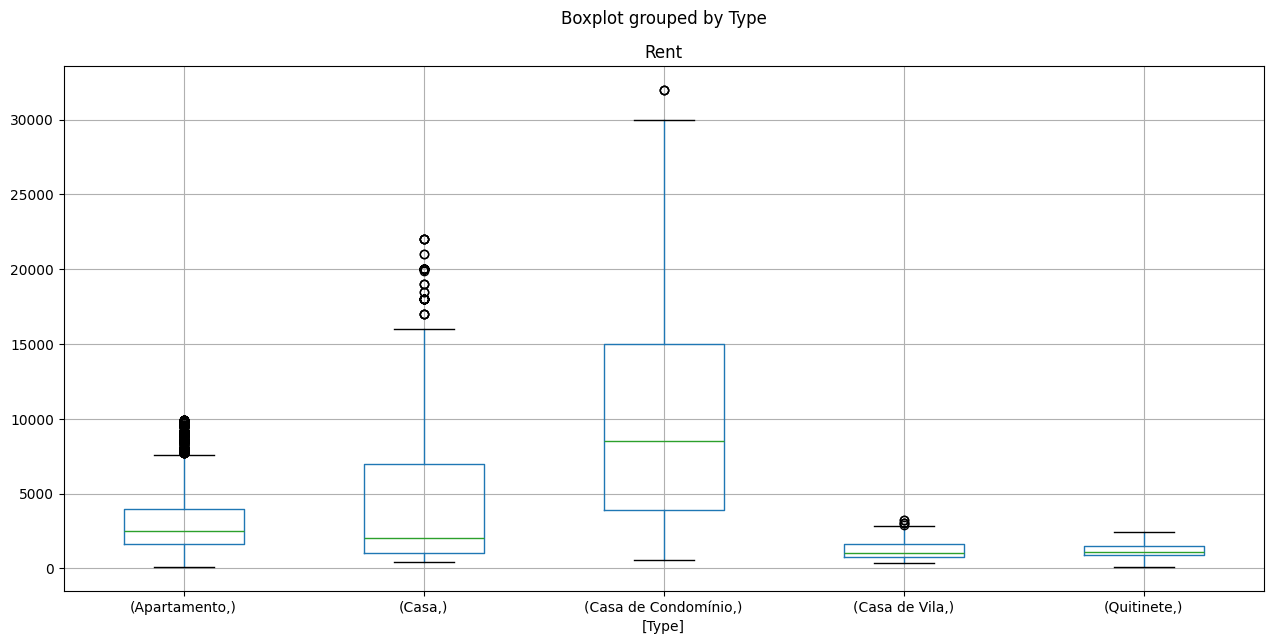

In [66]:
dados_new.boxplot(['Rent'], by = ['Type'])

In [67]:
dados_new.to_csv('aluguel_residencial_no_out.csv', sep = ';', index = False)